## Basics of Statistical Analysis


https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/01_intro.html

In [1]:
import pandas as pd
import seaborn as sns
import os

In [2]:
os.getcwd() 

'C:\\Users\\user\\Desktop\\Advanced Data Analysis with Python\\Week 7 - Statistics'

In [3]:
data = pd.read_json('C:/Users/user/Desktop/Advanced Data Analysis with Python/Datasets/twitter_data_ML.json')
data.columns

Index(['emoji_n', 'tweet_length', 'tweet_unique_length', 'created_at',
       'province_codes', 'female', 'followers_count', 'following_count',
       'age_group', 'university_rank', 'university', 'tweets', 'n_neg_sent',
       'n_pos_sent', 'rank_dummy', 'big_cities', 'avr_w_length', 'positive'],
      dtype='object')

In [4]:
data = data[['emoji_n', 'tweet_length', 'tweet_unique_length',
       'province_codes', 'female', 'followers_count', 'following_count',
       'age_group', 'university_rank', 'university', 'n_pos_sent', 'rank_dummy', 
       'big_cities', 'avr_w_length', 'positive']]
data

,emoji_n,tweet_length,tweet_unique_length,province_codes,female,followers_count,following_count,age_group,university_rank,university,n_pos_sent,rank_dummy,big_cities,avr_w_length,positive
0,0.2,51.6,15.8,48,0,222,42,2,474.57,muÄŸla sÄ±tkÄ± koÃ§man Ã¼niversitesi,5,0,0,6.894737,1
1,0.0,67.4,19.8,35,0,145,419,3,613.16,dokuz eylÃ¼l Ã¼niversitesi,5,1,1,5.500000,1
2,0.0,48.6,17.4,5,1,58,60,1,322.48,amasya Ã¼niversitesi,4,0,0,7.250000,1
3,0.2,57.6,18.6,33,0,30,27,2,490.43,mersin Ã¼niversitesi,4,0,0,6.111111,1
4,1.2,17.4,9.8,34,1,83,152,2,379.06,kadir has Ã¼niversitesi,5,0,1,5.800000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,1.0,43.6,16.2,32,1,143,344,2,546.20,sÃ¼leyman demirel Ã¼niversitesi,4,1,0,6.750000,1
4100,0.0,60.0,20.2,1,0,106,98,2,597.35,Ã§ukurova Ã¼niversitesi,5,1,0,5.761905,1
4101,0.0,100.8,21.8,78,1,128,170,1,461.57,karabÃ¼k Ã¼niversitesi,5,0,0,6.861111,1
4102,0.0,82.6,17.4,42,0,0,5,3,534.96,anadolu Ã¼niversitesi,5,1,0,8.375000,1


I produced two variables recently:

average word length, positive

Following command line shows the operation.

You should not run the following command line, since these variables are already defined.

In [ ]:
def average(numbers):
    if len(numbers)>0:
        return sum(numbers)/len(numbers)
    else:
        return 0

avr_w_length = []

tweets = data['tweets'].to_numpy()

for i in range(len(tweets)):
    words = str(tweets[i]).split()
    lengths = [len(word) for word in words]
    avr_w_length.append(average(lengths))
    
data['avr_w_length'] = pd.DataFrame(avr_w_length)

#------------------------------------------------------------------

data['positive'] = pd.cut(data['n_pos_sent'],[0,3,5],labels=[0,1])

In [5]:
data['female']
#male=0, female=1

0       0
1       0
2       1
3       0
4       1
       ..
4099    1
4100    0
4101    1
4102    0
4103    1
Name: female, Length: 4104, dtype: int64

### histogram

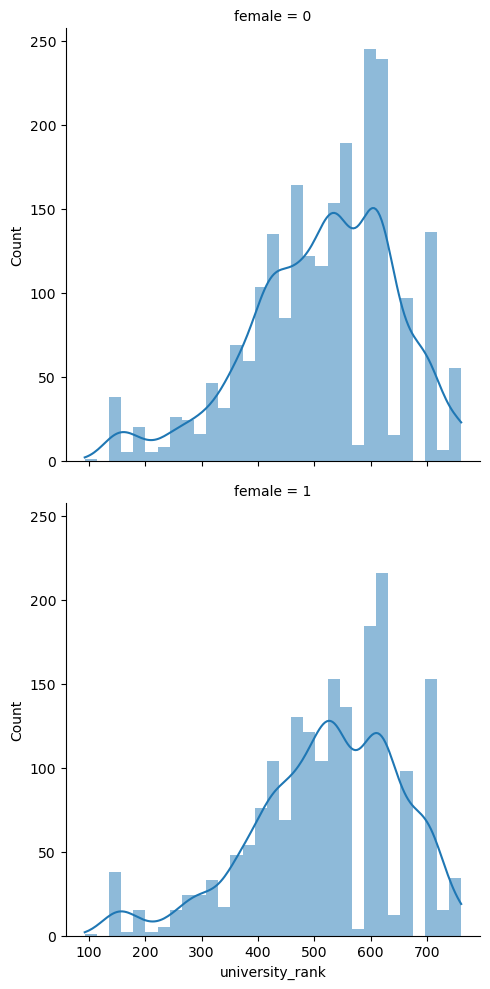

In [6]:
sns.displot(x='university_rank', row='female', data=data, linewidth=0, kde=True);

### overlaying kernel density plots

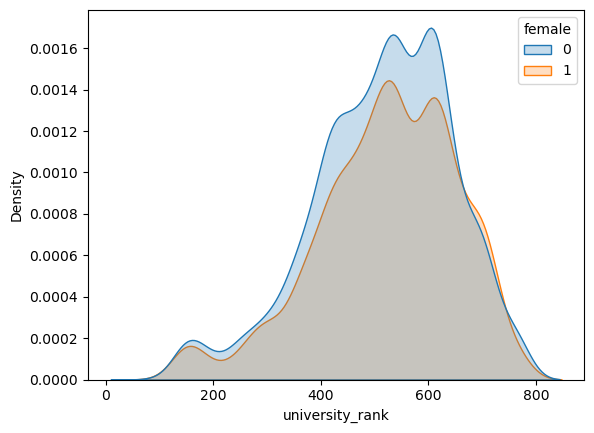

In [7]:
sns.kdeplot(x='university_rank', hue='female', data=data, shade=True);

### t-test

In [8]:
female_rank = data[data['female'] == 1]['university_rank']
male_rank = data[data['female'] == 0]['university_rank']

In [9]:
female_rank

2       322.48
4       379.06
6       474.57
9       428.13
17      559.26
         ...  
4094    667.16
4097    184.89
4099    546.20
4101    461.57
4103    428.13
Name: university_rank, Length: 1887, dtype: float64

In [10]:
from scipy import stats

In [11]:
#Whether variances are equal or not, null hypothesis is that they are equal
stats.levene(female_rank, male_rank)

LeveneResult(statistic=0.01846547010522381, pvalue=0.8919167181354736)

In [12]:
#pip install statsmodels

In [13]:
import statsmodels.stats.api as sms

In [14]:
model = sms.CompareMeans.from_data(data[data['female'] == 1]['university_rank'], data[data['female'] == 0]['university_rank'])
model.summary(usevar='pooled') #pooled or unequal, you have two options

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,6.9828,4.085,1.709,0.087,-1.026,14.992


The difference between males and females are not statistically significant at 0.05 p_value. However, the interpretation might change if we reconsider the output at 0.1 p_value.

### Cross-tabs

In [15]:
#age ranges: -18,19-29,30-39,40+

contab_freq = pd.crosstab(
    data['female'],
    data['age_group'],
    margins = True
    #, normalize='index'
   )
contab_freq

age_group,0,1,2,3,All
female,,,,,
0,436,268,1072,441,2217
1,92,617,1141,37,1887
All,528,885,2213,478,4104


In [16]:
chi = stats.chi2_contingency(contab_freq)
chi

(683.239415087605,
 2.9023046285429148e-142,
 8,
 array([[ 285.22807018,  478.08114035, 1195.47295322,  258.21783626,
         2217.        ],
        [ 242.77192982,  406.91885965, 1017.52704678,  219.78216374,
         1887.        ],
        [ 528.        ,  885.        , 2213.        ,  478.        ,
         4104.        ]]))

### Correlation and scatterplots

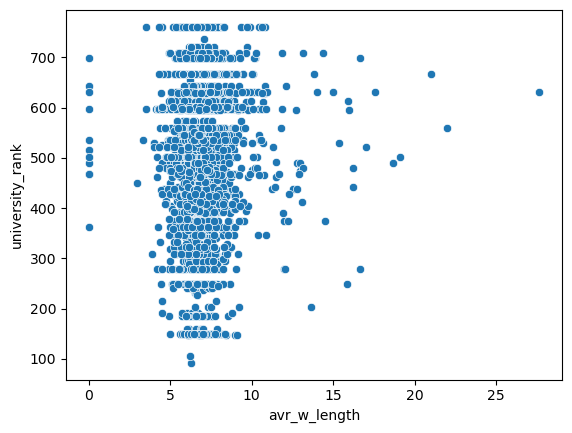

In [17]:
import seaborn as sns
sns.scatterplot(x="avr_w_length", y="university_rank", data=data);

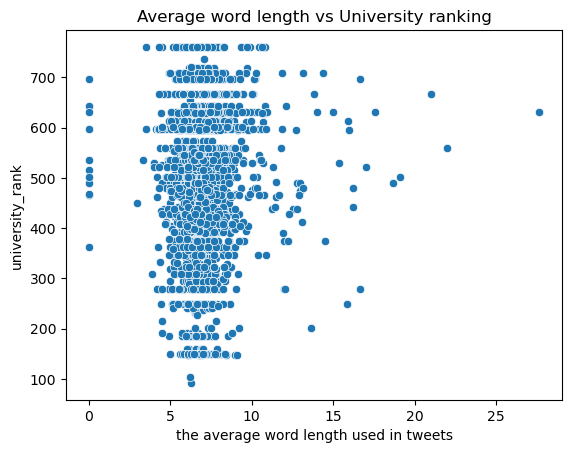

In [18]:
ax = sns.scatterplot(x="avr_w_length", y="university_rank", data=data);
ax.set_title("Average word length vs University ranking")
ax.set_xlabel("the average word length used in tweets");

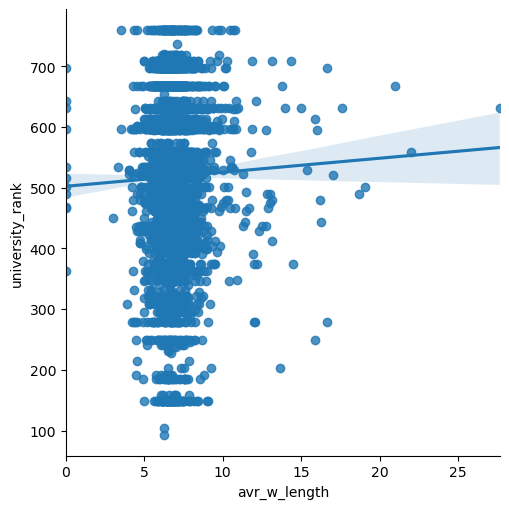

In [19]:
sns.lmplot(x="avr_w_length", y="university_rank", data=data)

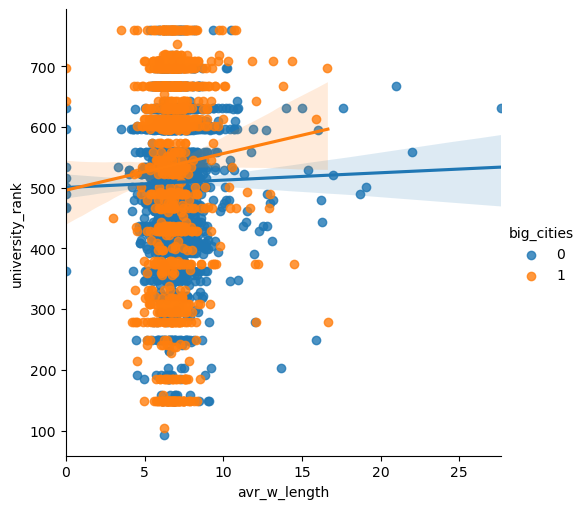

In [20]:
sns.lmplot(x="avr_w_length", y="university_rank",hue="big_cities", data=data)

In [21]:
from scipy import stats
stats.pearsonr(data['avr_w_length'], data['university_rank'])
#coefficient correlation and p-value

(0.02311439881348079, 0.13873661311347862)

In [22]:
data.corr()

,emoji_n,tweet_length,tweet_unique_length,province_codes,female,followers_count,following_count,age_group,university_rank,n_pos_sent,rank_dummy,big_cities,avr_w_length,positive
emoji_n,1.000000,0.003481,-0.030346,0.005865,0.137470,-0.006389,-0.010401,0.003828,-0.000586,0.007358,-0.003140,0.034620,-0.013349,-0.002171
tweet_length,0.003481,1.000000,0.714060,-0.006951,-0.047473,-0.010433,-0.006950,-0.001166,0.063501,-0.155813,0.045774,0.038781,0.029208,-0.133196
tweet_unique_length,-0.030346,0.714060,1.000000,-0.020412,0.047759,0.001095,0.008867,-0.019045,0.041616,-0.184652,0.033093,0.027474,0.069990,-0.142267
province_codes,0.005865,-0.006951,-0.020412,1.000000,-0.027098,0.002234,0.011714,0.010372,-0.285607,0.017926,-0.326886,-0.194018,-0.006165,-0.008328
female,0.137470,-0.047473,0.047759,-0.027098,1.000000,-0.023237,-0.029483,-0.052630,0.026679,-0.057973,0.006133,0.051371,0.017823,-0.052048
followers_count,-0.006389,-0.010433,0.001095,0.002234,-0.023237,1.000000,0.909358,-0.014104,-0.013577,0.004139,0.010576,0.004535,0.001343,-0.015113
following_count,-0.010401,-0.006950,0.008867,0.011714,-0.029483,0.909358,1.000000,-0.017637,-0.016516,-0.004842,0.006962,-0.004617,0.008736,-0.018891
age_group,0.003828,-0.001166,-0.019045,0.010372,-0.052630,-0.014104,-0.017637,1.000000,-0.027568,0.001428,-0.009095,-0.022526,-0.023481,0.012042
university_rank,-0.000586,0.063501,0.041616,-0.285607,0.026679,-0.013577,-0.016516,-0.027568,1.000000,-0.072898,0.784771,0.102856,0.023114,-0.057579
n_pos_sent,0.007358,-0.155813,-0.184652,0.017926,-0.057973,0.004139,-0.004842,0.001428,-0.072898,1.000000,-0.043984,0.000862,-0.039598,0.831047


<AxesSubplot:>

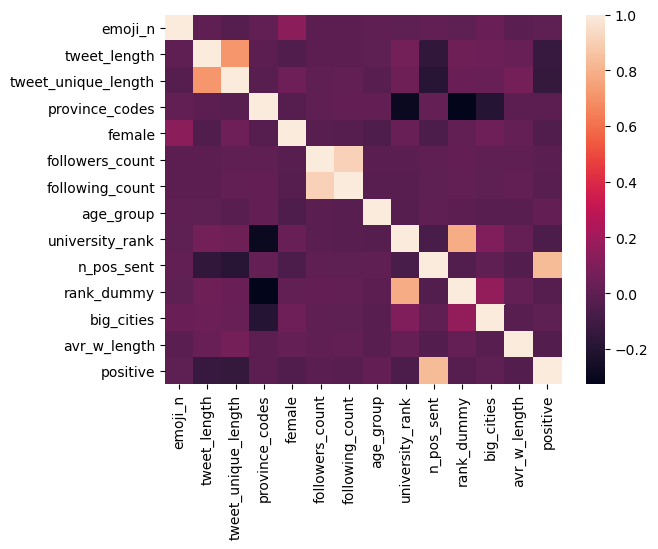

In [23]:
#Seaborn heatmap
sns.heatmap(data.corr())

### Simple regression analysis

In [24]:
data

,emoji_n,tweet_length,tweet_unique_length,province_codes,female,followers_count,following_count,age_group,university_rank,university,n_pos_sent,rank_dummy,big_cities,avr_w_length,positive
0,0.2,51.6,15.8,48,0,222,42,2,474.57,muÄŸla sÄ±tkÄ± koÃ§man Ã¼niversitesi,5,0,0,6.894737,1
1,0.0,67.4,19.8,35,0,145,419,3,613.16,dokuz eylÃ¼l Ã¼niversitesi,5,1,1,5.500000,1
2,0.0,48.6,17.4,5,1,58,60,1,322.48,amasya Ã¼niversitesi,4,0,0,7.250000,1
3,0.2,57.6,18.6,33,0,30,27,2,490.43,mersin Ã¼niversitesi,4,0,0,6.111111,1
4,1.2,17.4,9.8,34,1,83,152,2,379.06,kadir has Ã¼niversitesi,5,0,1,5.800000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,1.0,43.6,16.2,32,1,143,344,2,546.20,sÃ¼leyman demirel Ã¼niversitesi,4,1,0,6.750000,1
4100,0.0,60.0,20.2,1,0,106,98,2,597.35,Ã§ukurova Ã¼niversitesi,5,1,0,5.761905,1
4101,0.0,100.8,21.8,78,1,128,170,1,461.57,karabÃ¼k Ã¼niversitesi,5,0,0,6.861111,1
4102,0.0,82.6,17.4,42,0,0,5,3,534.96,anadolu Ã¼niversitesi,5,1,0,8.375000,1


In [25]:
import statsmodels.api as sm

In [26]:
y = data['university_rank']
X = data['avr_w_length']

In [27]:
X

0       6.894737
1       5.500000
2       7.250000
3       6.111111
4       5.800000
          ...   
4099    6.750000
4100    5.761905
4101    6.861111
4102    8.375000
4103    6.500000
Name: avr_w_length, Length: 4104, dtype: float64

In [28]:
X = sm.add_constant(X)
#In OLS models, we have always Beta zero coefficient as an explanatory variable, which is known as the intercept of the line.

In [29]:
X

,const,avr_w_length
0,1.0,6.894737
1,1.0,5.500000
2,1.0,7.250000
3,1.0,6.111111
4,1.0,5.800000
...,...,...
4099,1.0,6.750000
4100,1.0,5.761905
4101,1.0,6.861111
4102,1.0,8.375000


In [30]:
model = sm.OLS(y, X, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        university_rank   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.193
Date:                Thu, 01 Sep 2022   Prob (F-statistic):              0.139
Time:                        16:14:15   Log-Likelihood:                -25813.
No. Observations:                4104   AIC:                         5.163e+04
Df Residuals:                    4102   BIC:                         5.164e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          502.4707     10.907     46.070      0.000     481.088     523.854
avr_w_length     2.3084      1.559      1.481      0.139      -0.748       5.365
==============================================================================
Omnibus:                      219.320   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.320
Skew:                          -0.599   Prob(JB):                     5.96e-56
Kurtosis:                       3.232   Cond. No.                         38.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regression diagnostics

#### Histogram of residuals

<AxesSubplot:ylabel='Count'>

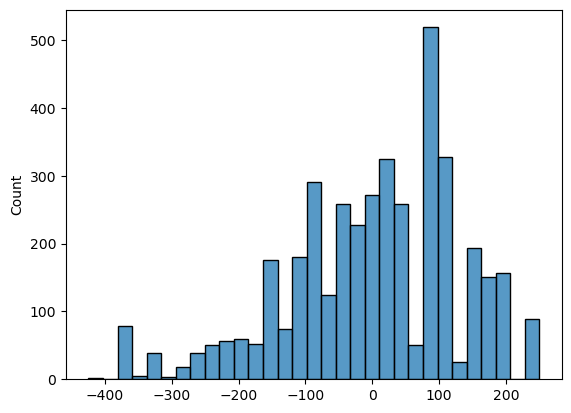

In [31]:
import seaborn as sns
sns.histplot(model_result.resid)

In [32]:
from scipy import stats
mu, std = stats.norm.fit(model_result.resid)
mu, std

(-1.6044692107300195e-13, 130.41048855316626)

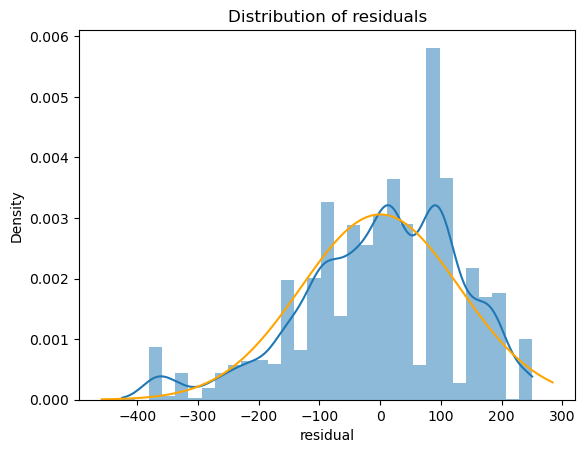

In [33]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=model_result.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

#### Boxplot of residuals

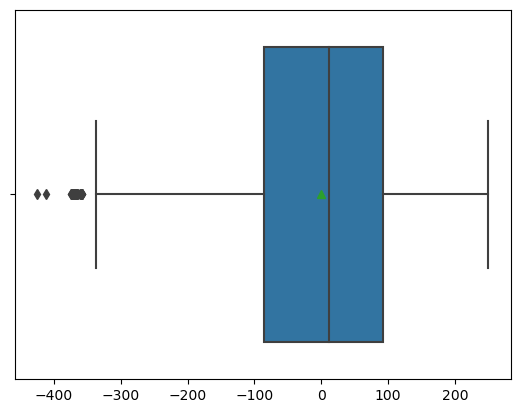

In [34]:
sns.boxplot(x=model_result.resid, showmeans=True);


#### Qqplot of residuals

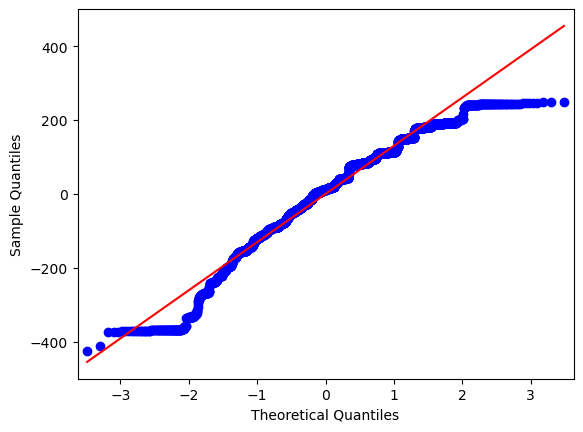

In [35]:
sm.qqplot(model_result.resid, line='s');

#### Fit plot

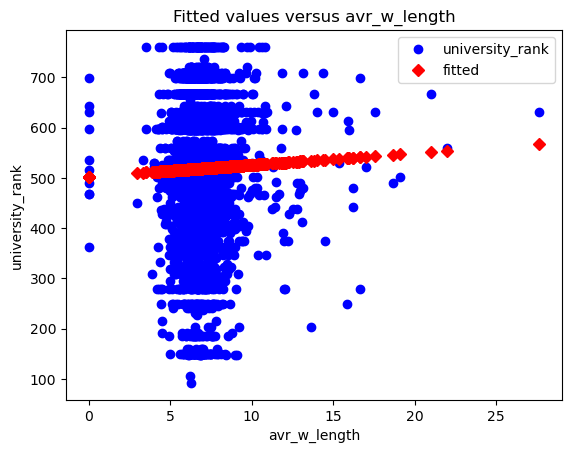

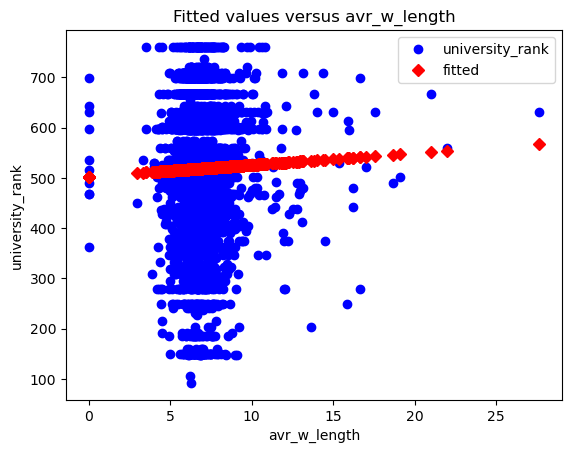

In [36]:
sm.graphics.plot_fit(model_result, 1, vlines=False)

In [37]:
model_result.fittedvalues

0       518.386313
1       515.166746
2       519.206392
3       516.577416
4       515.859257
           ...    
4099    518.052207
4100    515.771319
4101    518.308692
4102    521.803307
4103    517.475115
Length: 4104, dtype: float64

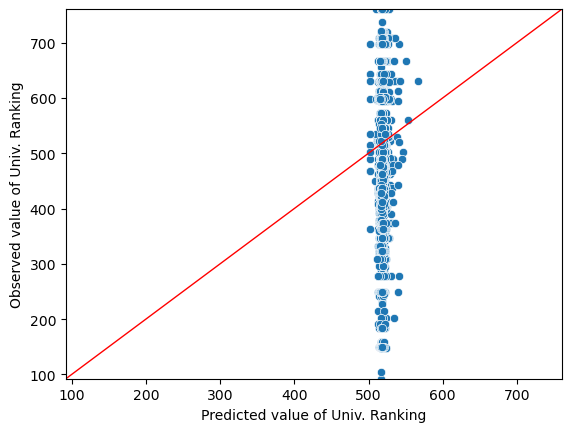

In [38]:
Y_max = y.max()
Y_min = y.min()

ax = sns.scatterplot(x=model_result.fittedvalues, y=y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max)) #revise Y_min and Y_max with 450 and 550
ax.set_xlabel("Predicted value of Univ. Ranking")
ax.set_ylabel("Observed value of Univ. Ranking")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

We can say that we have a good-fitting estimation, but do not have a great predictor.

### Multiple regression models

In [44]:
y = data['university_rank']
X = data[['emoji_n', 'tweet_length', 'tweet_unique_length', 'positive']]
X = sm.add_constant(X)

In [45]:
ks = sm.OLS(y, X)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        university_rank   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.773
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           1.98e-05
Time:                        16:15:27   Log-Likelihood:                -25800.
No. Observations:                4104   AIC:                         5.161e+04
Df Residuals:                    4099   BIC:                         5.164e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 520.2941     15.334     33.930      0.000     490.230     550.358
emoji_n                -0.4626      5.519     -0.084      0.933     -11.284      10.358
tweet_length            0.2290      0.078      2.951      0.003       0.077       0.381
tweet_unique_length    -0.5216      0.926     -0.563      0.573      -2.338       1.295
positive              -15.9948      4.976     -3.215      0.001     -25.750      -6.240
==============================================================================
Omnibus:                      224.728   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.552
Skew:                          -0.606   Prob(JB):                     1.60e-57
Kurtosis:                       3.243   Cond. No.                         768.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
y = data['university_rank']
X = data[['emoji_n', 'tweet_length', 'tweet_unique_length', 'positive', 'followers_count',
          'following_count', 'age_group', 'female', 'avr_w_length']]
X = sm.add_constant(X)

In [47]:
ks = sm.OLS(y, X)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        university_rank   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.997
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           4.22e-05
Time:                        16:15:30   Log-Likelihood:                -25796.
No. Observations:                4104   AIC:                         5.161e+04
Df Residuals:                    4094   BIC:                         5.167e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 514.1013     18.756     27.409      0.000     477.328     550.874
emoji_n                -1.7993      5.576     -0.323      0.747     -12.731       9.133
tweet_length            0.2492      0.078      3.186      0.001       0.096       0.403
tweet_unique_length    -0.8092      0.935     -0.865      0.387      -2.643       1.025
positive              -15.3964      4.983     -3.090      0.002     -25.166      -5.627
followers_count         0.0009      0.003      0.278      0.781      -0.006       0.008
following_count        -0.0031      0.004     -0.697      0.486      -0.012       0.006
age_group              -3.9495      2.398     -1.647      0.100      -8.650       0.751
female                  7.0510      4.162      1.694      0.090      -1.110      15.212
avr_w_length            1.9596      1.560      1.256      0.209      -1.099       5.018
==============================================================================
Omnibus:                      224.128   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.746
Skew:                          -0.606   Prob(JB):                     2.40e-57
Kurtosis:                       3.241   Cond. No.                     1.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
import statsmodels.formula.api as smf
ksf =  smf.ols('university_rank ~ emoji_n + tweet_length + tweet_unique_length + positive + followers_count + following_count + age_group + female + avr_w_length', data=data)
ksf_res = ksf.fit()
ksf_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        university_rank   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.997
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           4.22e-05
Time:                        16:19:09   Log-Likelihood:                -25796.
No. Observations:                4104   AIC:                         5.161e+04
Df Residuals:                    4094   BIC:                         5.167e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             514.1013     18.756     27.409      0.000     477.328     550.874
emoji_n                -1.7993      5.576     -0.323      0.747     -12.731       9.133
tweet_length            0.2492      0.078      3.186      0.001       0.096       0.403
tweet_unique_length    -0.8092      0.935     -0.865      0.387      -2.643       1.025
positive              -15.3964      4.983     -3.090      0.002     -25.166      -5.627
followers_count         0.0009      0.003      0.278      0.781      -0.006       0.008
following_count        -0.0031      0.004     -0.697      0.486      -0.012       0.006
age_group              -3.9495      2.398     -1.647      0.100      -8.650       0.751
female                  7.0510      4.162      1.694      0.090      -1.110      15.212
avr_w_length            1.9596      1.560      1.256      0.209      -1.099       5.018
==============================================================================
Omnibus:                      224.128   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.746
Skew:                          -0.606   Prob(JB):                     2.40e-57
Kurtosis:                       3.241   Cond. No.                     1.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking for colinearity

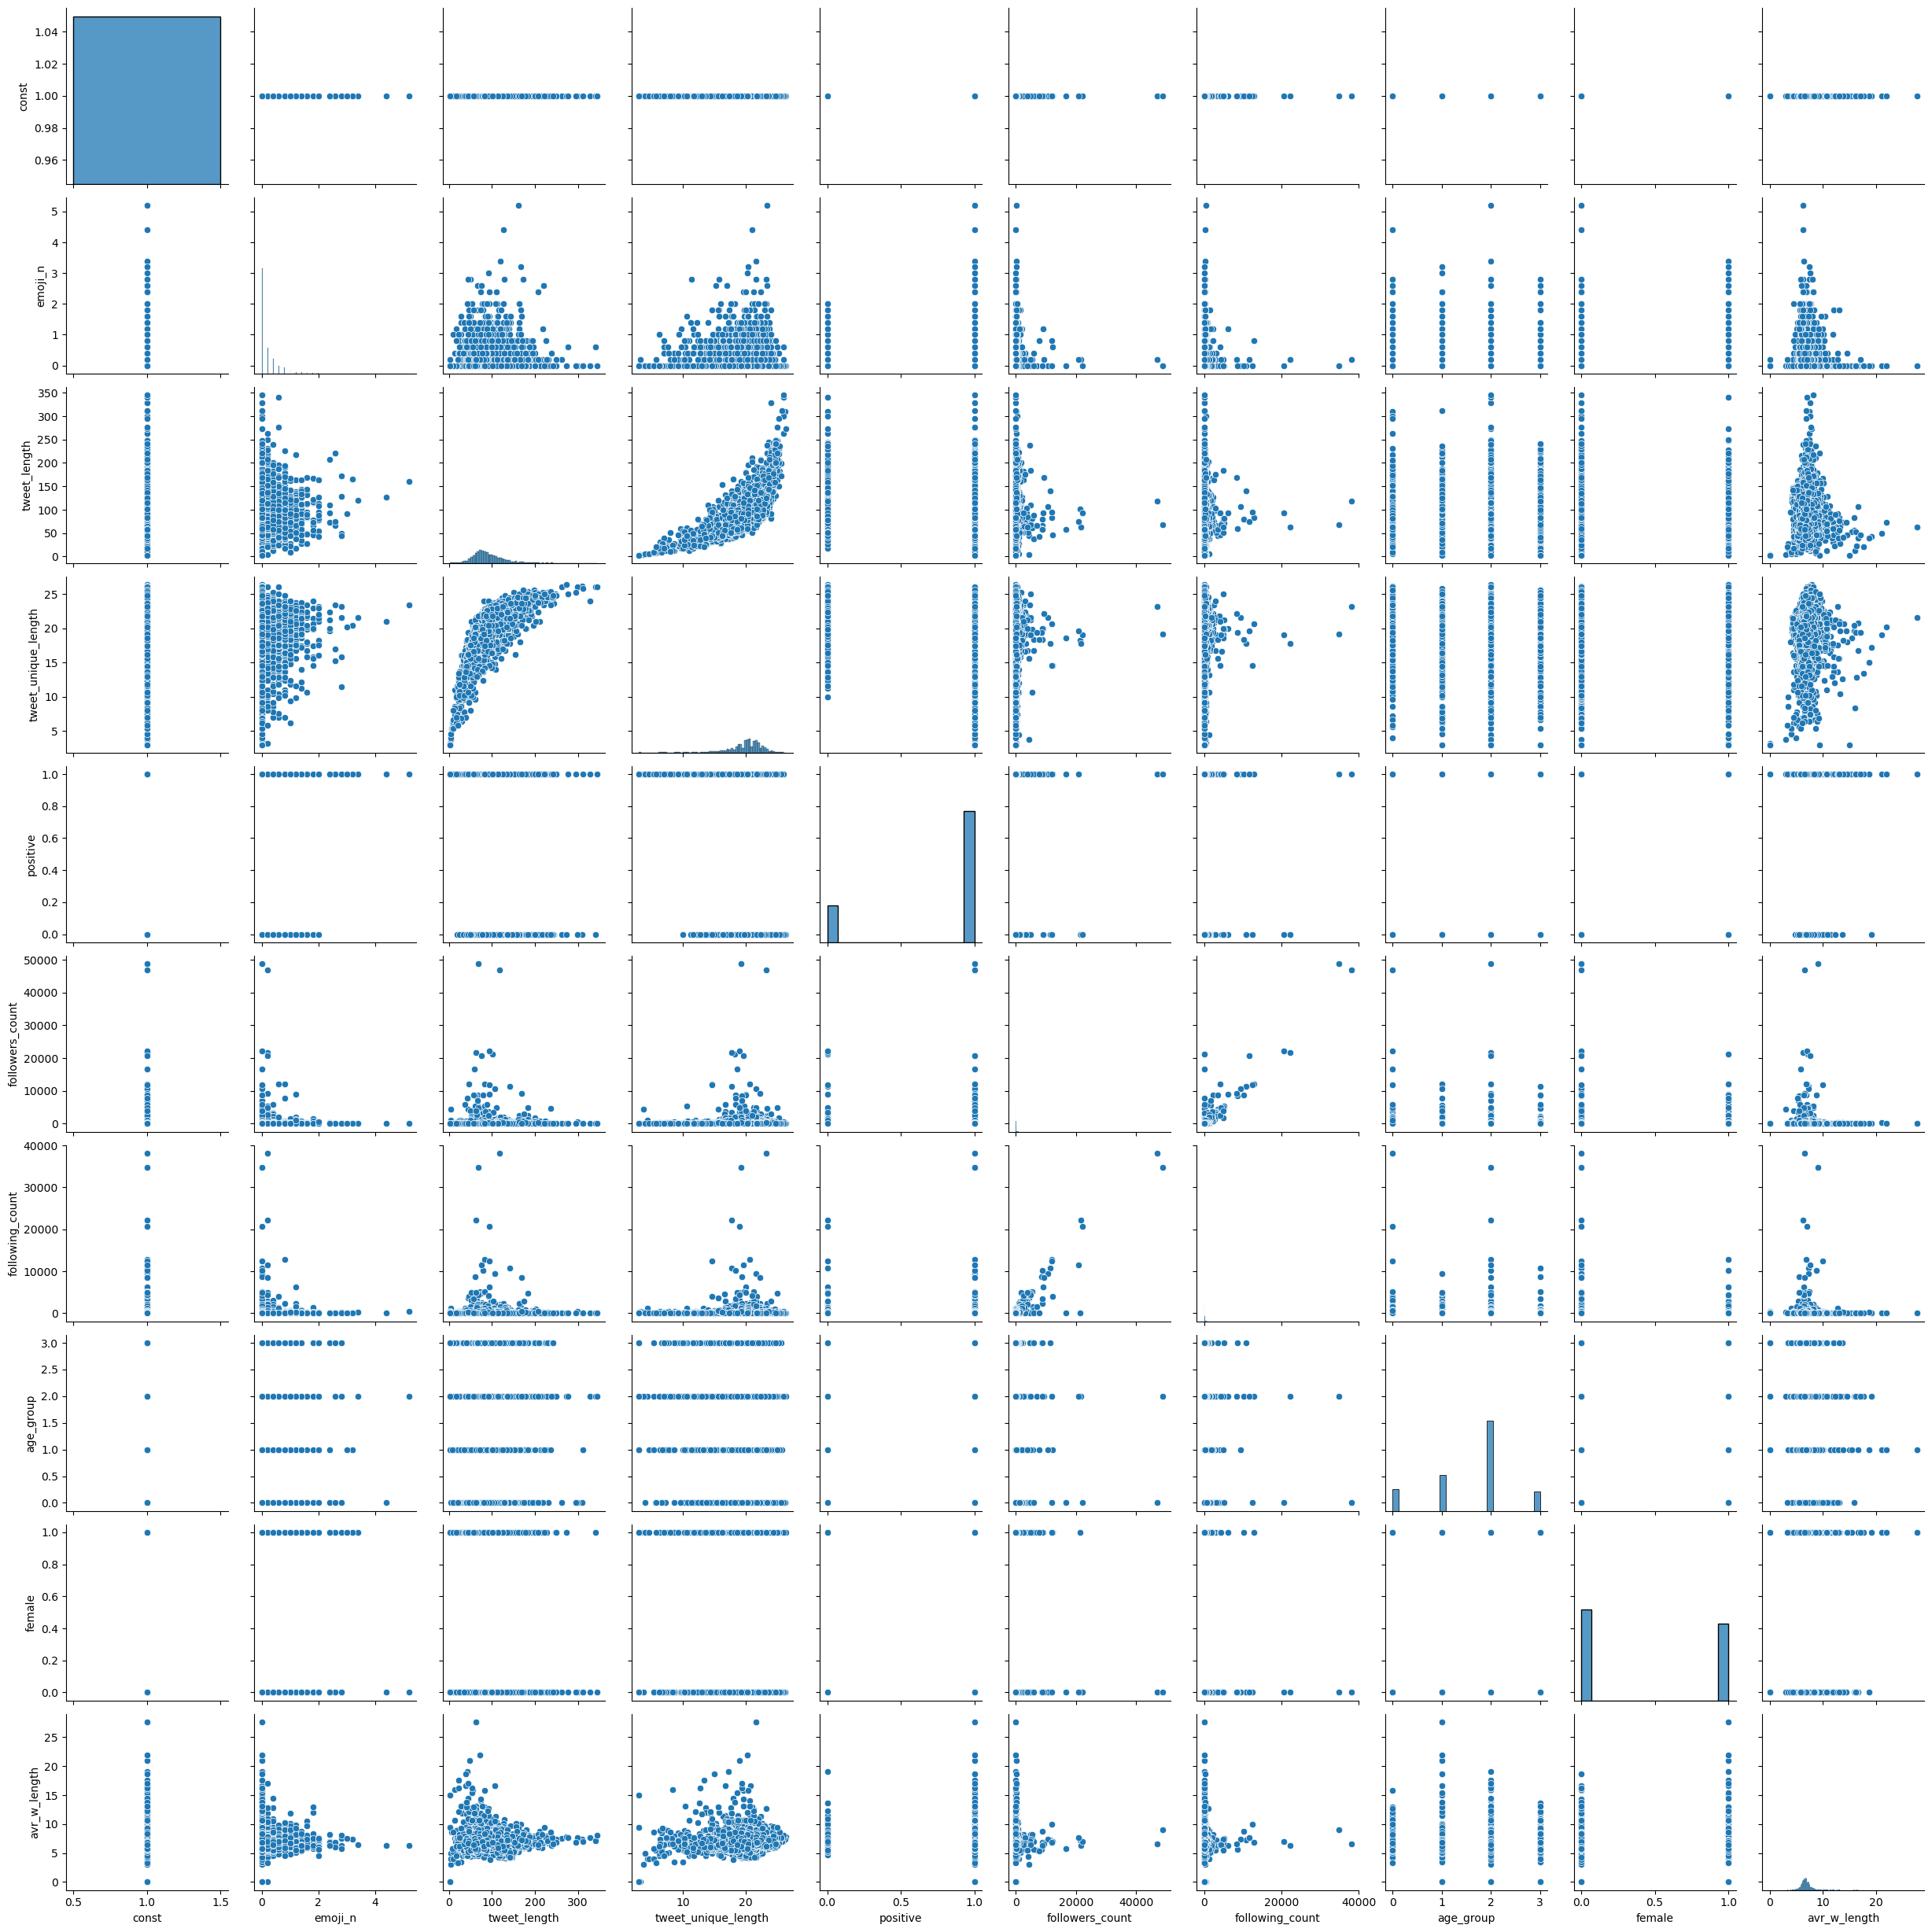

In [50]:
import seaborn as sns
sns.pairplot(X)

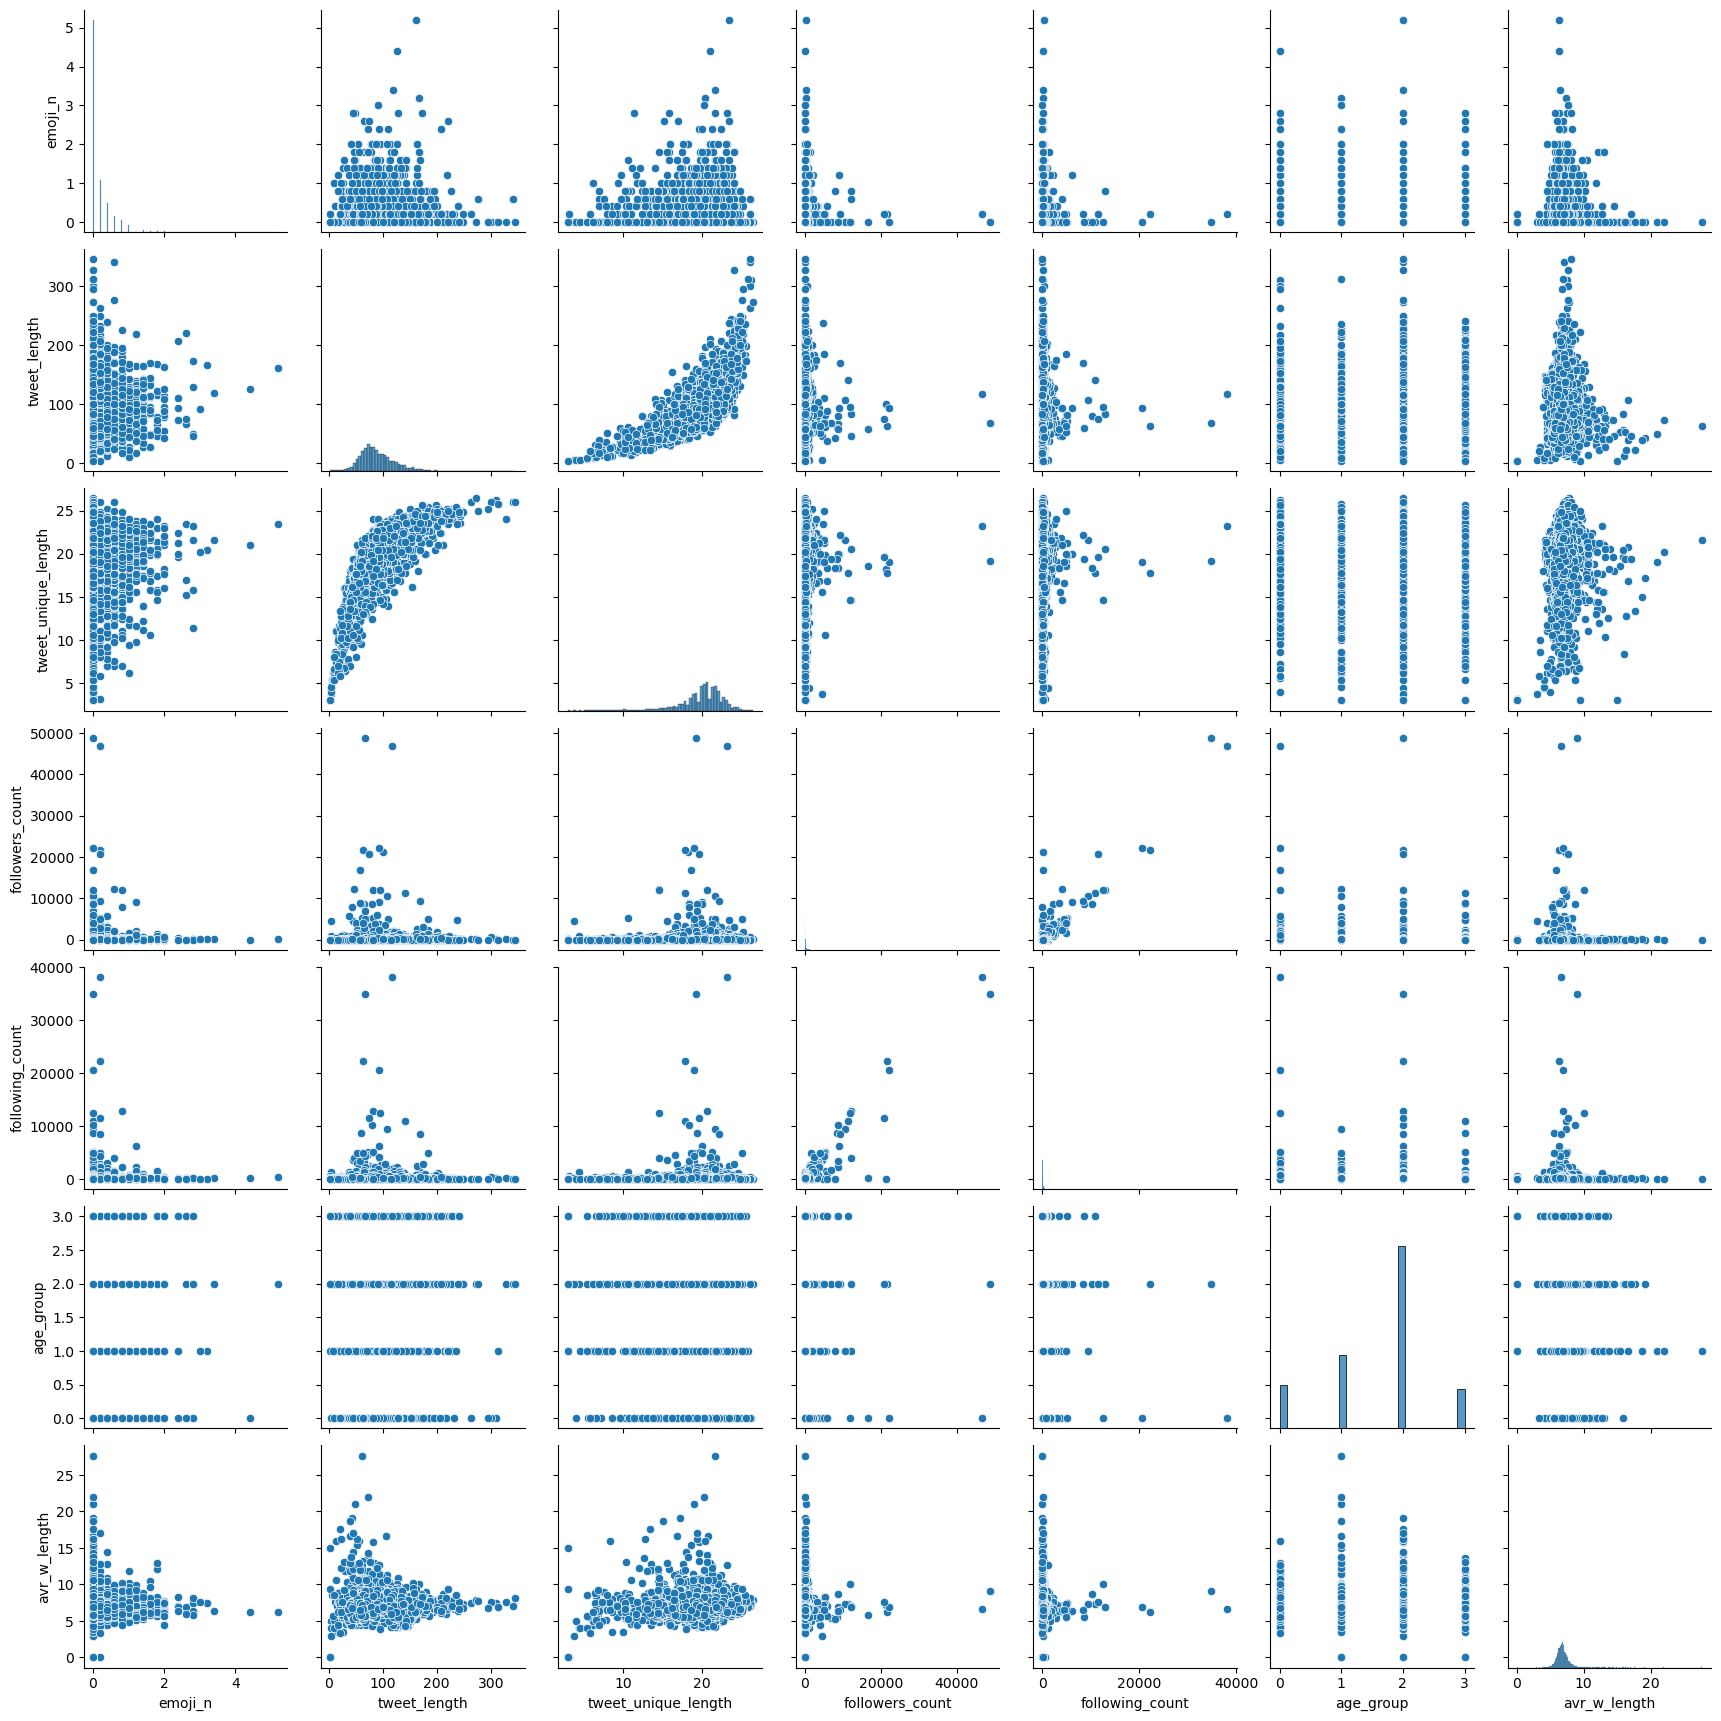

In [51]:
sns.pairplot(X[['emoji_n', 'tweet_length', 'tweet_unique_length', 'followers_count',
          'following_count', 'age_group', 'avr_w_length']])

In [52]:
round(data.corr(),2)

,emoji_n,tweet_length,tweet_unique_length,province_codes,female,followers_count,following_count,age_group,university_rank,n_pos_sent,rank_dummy,big_cities,avr_w_length,positive
emoji_n,1.00,0.00,-0.03,0.01,0.14,-0.01,-0.01,0.00,-0.00,0.01,-0.00,0.03,-0.01,-0.00
tweet_length,0.00,1.00,0.71,-0.01,-0.05,-0.01,-0.01,-0.00,0.06,-0.16,0.05,0.04,0.03,-0.13
tweet_unique_length,-0.03,0.71,1.00,-0.02,0.05,0.00,0.01,-0.02,0.04,-0.18,0.03,0.03,0.07,-0.14
province_codes,0.01,-0.01,-0.02,1.00,-0.03,0.00,0.01,0.01,-0.29,0.02,-0.33,-0.19,-0.01,-0.01
female,0.14,-0.05,0.05,-0.03,1.00,-0.02,-0.03,-0.05,0.03,-0.06,0.01,0.05,0.02,-0.05
followers_count,-0.01,-0.01,0.00,0.00,-0.02,1.00,0.91,-0.01,-0.01,0.00,0.01,0.00,0.00,-0.02
following_count,-0.01,-0.01,0.01,0.01,-0.03,0.91,1.00,-0.02,-0.02,-0.00,0.01,-0.00,0.01,-0.02
age_group,0.00,-0.00,-0.02,0.01,-0.05,-0.01,-0.02,1.00,-0.03,0.00,-0.01,-0.02,-0.02,0.01
university_rank,-0.00,0.06,0.04,-0.29,0.03,-0.01,-0.02,-0.03,1.00,-0.07,0.78,0.10,0.02,-0.06
n_pos_sent,0.01,-0.16,-0.18,0.02,-0.06,0.00,-0.00,0.00,-0.07,1.00,-0.04,0.00,-0.04,0.83


In [55]:
X = X.drop(columns = ['tweet_length', 'followers_count'], inplace = False)

In [56]:
mod1 = sm.OLS(y, X)
mod1_res = mod1.fit()
mod1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        university_rank   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.670
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           0.000587
Time:                        16:21:56   Log-Likelihood:                -25801.
No. Observations:                4104   AIC:                         5.162e+04
Df Residuals:                    4096   BIC:                         5.167e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 497.0873     17.987     27.637      0.000     461.824     532.351
emoji_n                -0.8582      5.574     -0.154      0.878     -11.786      10.070
tweet_unique_length     1.3145      0.656      2.004      0.045       0.029       2.600
positive              -16.2298      4.981     -3.258      0.001     -25.995      -6.464
following_count        -0.0021      0.002     -1.141      0.254      -0.006       0.002
age_group              -3.8654      2.400     -1.611      0.107      -8.571       0.840
female                  5.4065      4.134      1.308      0.191      -2.698      13.511
avr_w_length            1.8110      1.561      1.160      0.246      -1.249       4.871
==============================================================================
Omnibus:                      218.081   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.671
Skew:                          -0.597   Prob(JB):                     1.36e-55
Kurtosis:                       3.229   Cond. No.                     1.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression diagnostics again

c:\users\user\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

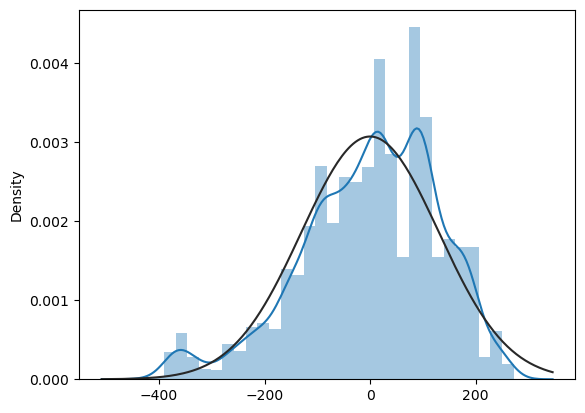

In [57]:
from scipy import stats
sns.distplot(mod1_res.resid, fit=stats.norm)

c:\users\user\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


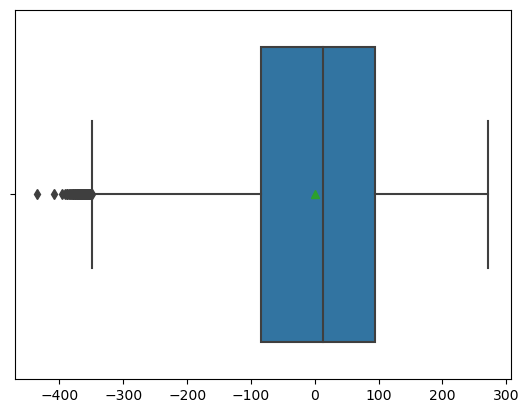

In [58]:
sns.boxplot(mod1_res.resid, showmeans=True);


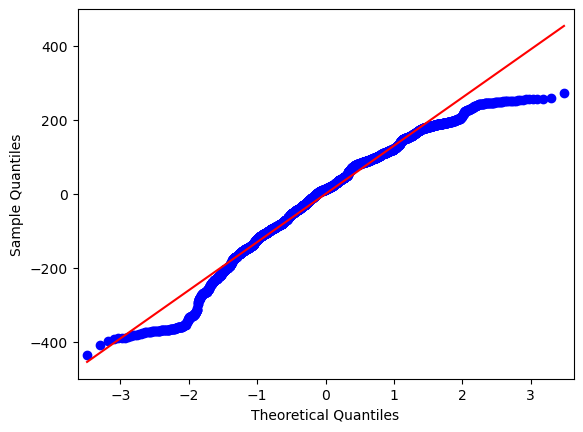

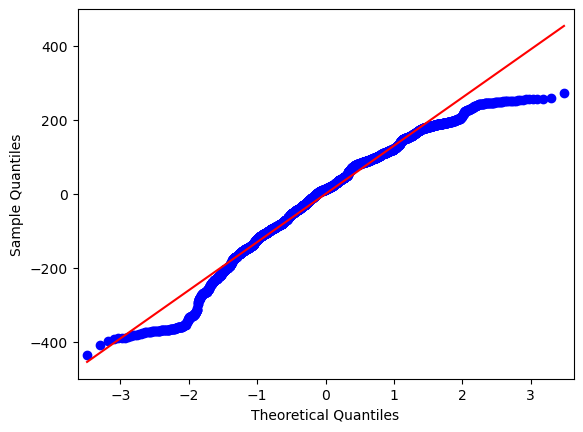

In [59]:
sm.qqplot(mod1_res.resid, line='s')

c:\users\user\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


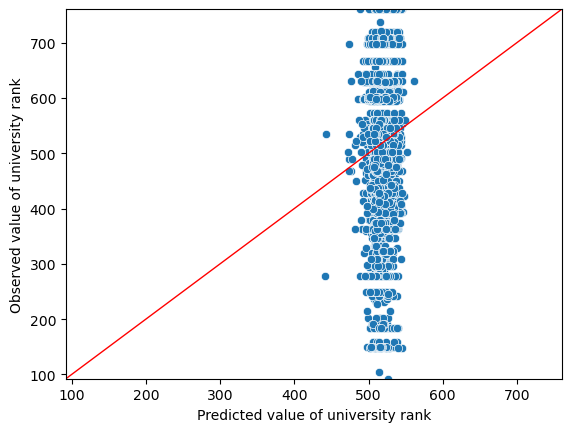

In [60]:
import matplotlib.pyplot as plt
import numpy as np

Y_max = y.max()
Y_min = y.min()

ax = sns.scatterplot(mod1_res.fittedvalues, y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of university rank")
ax.set_ylabel("Observed value of university rank")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

### Standardize variables

In [61]:
from scipy import stats
y_norm = pd.Series(stats.zscore(y), name=y.name)
y_norm.head(3)

0   -0.335524
1    0.726914
2   -1.501453
Name: university_rank, dtype: float64

In [62]:
X_norm = X.loc[:, X.columns != "const"]
X_norm = pd.DataFrame(stats.zscore(X_norm))
X_norm = sm.add_constant(X_norm)
X_norm.columns = X.columns
check = pd.concat([round(X_norm.mean(axis=0), 5), round(X_norm.std(axis=0, ddof=0), 5)], axis=1)
check.columns=["mean", "std dev"]
check

,mean,std dev
const,1.0,0.0
emoji_n,0.0,1.0
tweet_unique_length,0.0,1.0
positive,-0.0,1.0
following_count,0.0,1.0
age_group,0.0,1.0
female,0.0,1.0
avr_w_length,-0.0,1.0


In [63]:
modstd = sm.OLS(y_norm, X_norm)
modstd_res = modstd.fit()
modstd_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        university_rank   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.670
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           0.000587
Time:                        16:22:19   Log-Likelihood:                -5810.5
No. Observations:                4104   AIC:                         1.164e+04
Df Residuals:                    4096   BIC:                         1.169e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.735e-17      0.016  -1.11e-15      1.000      -0.031       0.031
emoji_n                -0.0024      0.016     -0.154      0.878      -0.033       0.028
tweet_unique_length     0.0317      0.016      2.004      0.045       0.001       0.063
positive               -0.0514      0.016     -3.258      0.001      -0.082      -0.020
following_count        -0.0178      0.016     -1.141      0.254      -0.048       0.013
age_group              -0.0251      0.016     -1.611      0.107      -0.056       0.005
female                  0.0207      0.016      1.308      0.191      -0.010       0.052
avr_w_length            0.0181      0.016      1.160      0.246      -0.013       0.049
==============================================================================
Omnibus:                      218.081   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.671
Skew:                          -0.597   Prob(JB):                     1.36e-55
Kurtosis:                       3.229   Cond. No.                         1.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

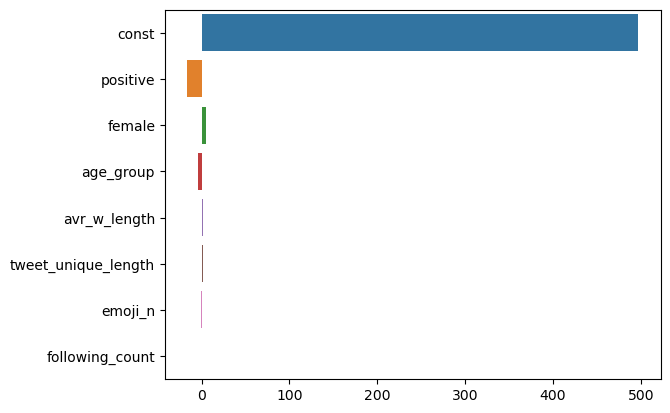

In [64]:
coeff = mod1_res.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h');

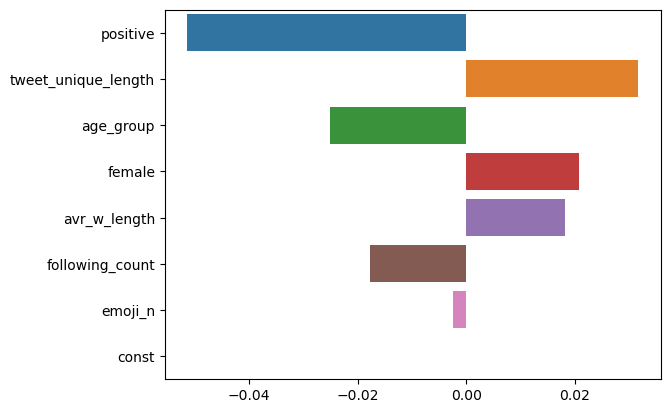

In [65]:
coeff = modstd_res.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h');